<a href="https://colab.research.google.com/github/Ch4rlesSm1th99/Neural-Networks-with-Numpy/blob/main/Neural_Networks_using_Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/8, Training Accuracy: 0.83, Loss: 0.7788
Epoch 2/8, Training Accuracy: 0.81, Loss: 0.7903
Epoch 3/8, Training Accuracy: 0.86, Loss: 0.6304
Epoch 4/8, Training Accuracy: 0.81, Loss: 0.6709
Epoch 5/8, Training Accuracy: 0.91, Loss: 0.3676
Epoch 6/8, Training Accuracy: 0.84, Loss: 0.6224
Epoch 7/8, Training Accuracy: 0.89, Loss: 0.6309
Epoch 8/8, Training Accuracy: 0.91, Loss: 0.4096


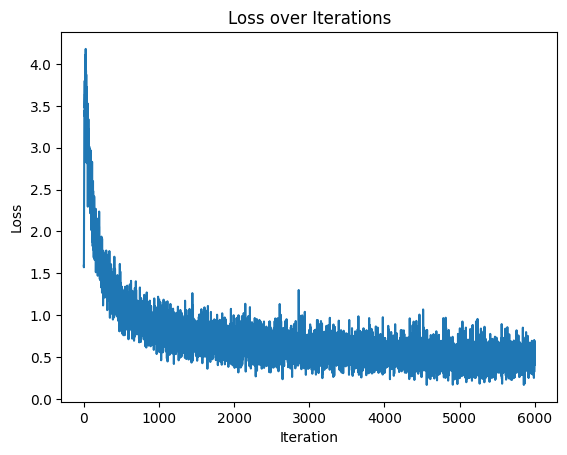

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms
from torch.utils.data.sampler import SubsetRandomSampler

# Use this line to display plots inline within the Jupyter notebook
%matplotlib inline

### Data Loading

# Define a function to load and transform the MNIST dataset
def mnist(batch_size, valid_size=0.2, shuffle=True, random_seed=2000):
    # Define transformations for the data
    transform = transforms.Compose([
        transforms.ToTensor(),
    ])

    # Load the dataset
    train_data = datasets.MNIST(root='./datasets', train=True, download=True, transform=transform)
    valid_data = datasets.MNIST(root='./datasets', train=True, download=True, transform=transform)
    test_data = datasets.MNIST(root='./datasets', train=False, download=True, transform=transform)

    # Creating data indices for training and validation splits
    num_train = len(train_data)
    indices = list(range(num_train))
    split = int(np.floor(valid_size * num_train))

    if shuffle:
        np.random.seed(random_seed)
        np.random.shuffle(indices)

    train_idx, valid_idx = indices[split:], indices[:split]

    # Create samplers for training and validation batches
    train_sampler = SubsetRandomSampler(train_idx)
    valid_sampler = SubsetRandomSampler(valid_idx)

    # Create data loaders
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, sampler=train_sampler)
    valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, sampler=valid_sampler)
    test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=shuffle)

    return train_loader, valid_loader, test_loader

batch_size = 64  # Number of samples per batch
train_loader, val_loader, test_loader = mnist(batch_size)

# Neural Network Parameters
ni = 28 * 28  # Number of input features (image pixels)
nh = 50       # Number of hidden layer neurons
no = 10       # Number of output classes (digits 0-9)

# Weight and Bias Initialization
W1 = np.random.randn(nh, ni)
b1 = np.zeros((nh, 1))
W2 = np.random.randn(no, nh)
b2 = np.zeros((no, 1))

# Activation Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Loss Function
def loss(yhat, y):
    return np.mean(np.sum(-y * np.log(yhat), axis=0))

# Training Loop
num_epochs = 8
lr = 0.1  # Learning rate
loss_values = []  # List to store loss values
epochs = []

for epoch in range(num_epochs):
    for batch in train_loader:
        X = batch[0].numpy().reshape(-1, ni).T  # Flatten the images
        labels = batch[1].numpy()
        y = np.eye(no)[labels].T  # One-hot encode the labels

        # Forward pass
        Z1 = W1 @ X + b1
        A1 = sigmoid(Z1)
        Z2 = W2 @ A1 + b2
        yhat = sigmoid(Z2)

        # Calculate loss
        current_loss = loss(yhat, y)
        loss_values.append(current_loss)  # Record the loss

        # Backward pass
        dZ2 = yhat - y
        dW2 = dZ2 @ A1.T / batch_size
        db2 = np.sum(dZ2, axis=1, keepdims=True) / batch_size

        dZ1 = W2.T @ dZ2 * A1 * (1 - A1)
        dW1 = dZ1 @ X.T / batch_size
        db1 = np.sum(dZ1, axis=1, keepdims=True) / batch_size

        # Parameter updates
        W2 -= lr * dW2
        b2 -= lr * db2
        W1 -= lr * dW1
        b1 -= lr * db1

    # Compute the training accuracy for each epoch
    predictions = np.argmax(yhat, axis=0)
    accuracy = np.mean(predictions == labels)
    print(f"Epoch {epoch+1}/{num_epochs}, Training Accuracy: {accuracy:.2f}, Loss: {current_loss:.4f}")

# Plot the loss values
plt.plot(loss_values)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over Iterations')
plt.show()